In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
import velocyto as vcy
import scvelo as scv
import pandas as pd

In [5]:
#artemia_plotting=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/data_integrated_harmony_DUBStepR_2.h5ad", chunk_size=6000)
artemia_plotting=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/data_integrated_harmony_DUBStepR_3_2.h5ad", chunk_size=6000)
#artemia_plotting=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/lower_ambient/data_integrated_replicates_rpca_6.h5ad", chunk_size=6000)
features_AR=pd.DataFrame({'features': artemia_plotting.raw.var['_index']})
#artemia_2=ad.AnnData(artemia_plotting_1.raw.X,obs=artemia_plotting_1.obs,var=features_AR,obsm=artemia_plotting_1.obsm, uns=artemia_plotting_1.uns)
#artemia_2.obs.index
features_AR=features_AR.set_index(features_AR['features'])
features_AR.index.name = None
bdata=artemia_plotting
artemia_plotting = ad.AnnData(
    X=bdata.raw.X,
    var=features_AR,
    obs=bdata.obs,
    layers=bdata.layers,obsm=bdata.obsm,uns=bdata.uns
)
artemia_plotting.obs['seurat_clusters'] = artemia_plotting.obs['seurat_clusters'].astype('category') 
#artemia_plotting=artemia_plotting[:, Spindle]
scv.utils.clean_obs_names(artemia_plotting)

In [6]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_1 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/2.replicate_1/Afran_1/velocyto/Afran_1.loom',cache=True)
barcodes_replicate_1  = [bc.split(':')[1] for bc in velo_out_replicate_1.obs.index.tolist()]
barcodes_replicate_1  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_1]
velo_out_replicate_1.obs.index = barcodes_replicate_1
velo_out_replicate_1.var_names_make_unique()
scv.utils.clean_obs_names(velo_out_replicate_1)
merged_adata_replicate_1=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_1")],velo_out_replicate_1)
#velo_out_replicate_2 =velo_out_replicate_2[velo_out_replicate_2.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [7]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_2 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/3.replicate_2/Afran_2/velocyto/Afran_2.loom',cache=True)
barcodes_replicate_2  = [bc.split(':')[1] for bc in velo_out_replicate_2.obs.index.tolist()]
barcodes_replicate_2  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_2]
velo_out_replicate_2.obs.index = barcodes_replicate_2 
velo_out_replicate_2.var_names_make_unique()
scv.utils.clean_obs_names(velo_out_replicate_2)
merged_adata_replicate_2=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")],velo_out_replicate_2)
#velo_out_replicate_2 =velo_out_replicate_2[velo_out_replicate_2.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [8]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_3 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
barcodes_replicate_3  = [bc.split(':')[1] for bc in velo_out_replicate_3.obs.index.tolist()]
barcodes_replicate_3  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_3]
velo_out_replicate_3.obs.index = barcodes_replicate_3
velo_out_replicate_3.var_names_make_unique()
scv.utils.clean_obs_names(velo_out_replicate_3)
merged_adata_replicate_3=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")],velo_out_replicate_3)
#velo_out_replicate_3 =velo_out_replicate_3[velo_out_replicate_3.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [9]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_4 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/5.replicate_4/Afran_ATAC2/outs/velocyto/gex_possorted_bam_BRQJI.loom', cache=True)
barcodes_replicate_4  = [bc.split(':')[1] for bc in velo_out_replicate_4.obs.index.tolist()]
barcodes_replicate_4  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_4]
velo_out_replicate_4.obs.index = barcodes_replicate_4
velo_out_replicate_4.var_names_make_unique()
scv.utils.clean_obs_names(velo_out_replicate_4)
merged_adata_replicate_4=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_4")],velo_out_replicate_4)
#velo_out_replicate_3 =velo_out_replicate_3[velo_out_replicate_3.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [10]:
merged_adata=merged_adata_replicate_1.concatenate(merged_adata_replicate_2,merged_adata_replicate_3,merged_adata_replicate_4)

In [19]:
merged_adata

AnnData object with n_obs × n_vars = 19911 × 36378
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'replicates', 'RNA_snn_res.2', 'RNA_snn_res.1.5', 'RNA_snn_res.0.5', 'RNA_snn_res.0.2', 'RNA_snn_res.0.1', 'seurat_clusters', 'sample_batch', 'Clusters', '_X', '_Y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'batch', 'new_clusters'
    var: 'features', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [12]:
#rename_clusters
old_to_new = {
    0:'Tracheal cells',
    1:'Germ cells A',
    2:'Ovarian muscle cells',3:'Escort cells',4:'Follicle cells',5:'Prefollicle cells',6:'Germ cells B'}
merged_adata.obs['new_clusters'] = (
    merged_adata.obs['seurat_clusters']
    .map(old_to_new)
    .astype('category')
)

saving figure to file /nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/figures/figures_celltypes.pdf


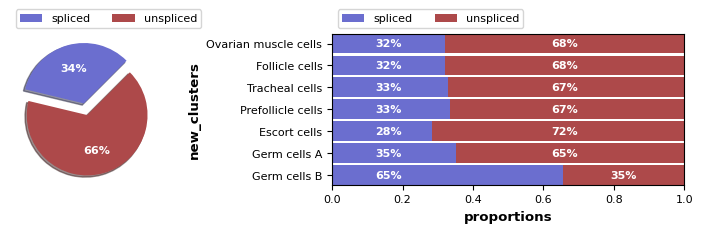

In [13]:
merged_adata.obs['new_clusters'] = merged_adata.obs['new_clusters'].cat.reorder_categories(['Ovarian muscle cells', 'Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B'])
scv.pl.proportions(merged_adata, groupby='new_clusters', save='/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/figures/figures_celltypes.pdf')

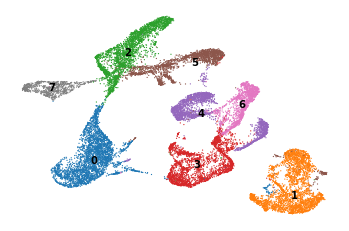

In [9]:
sc.pl.umap(merged_adata, color='seurat_clusters', frameon=False, legend_loc='on data', title='', save='_celltypes.pdf')
